In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
X,y=make_classification(n_samples=1000,n_features=3,n_classes=2,n_informative=3,n_redundant=0,random_state=42 )

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)   


In [14]:
param_grid={
    'n_neighbors':[3,5,7,9,11],
}

In [15]:
knn=KNeighborsClassifier(algorithm='auto')

In [16]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn,param_grid,cv=5)

In [17]:
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy: {accuracy*100:.2f}%")


Best Parameters: {'n_neighbors': 5}
Accuracy: 94.50%


In [19]:
print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("\nClassification Report:")
cr=classification_report(y_test,y_pred)
print(cr)


Confusion Matrix:
[[103   7]
 [  4  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       110
           1       0.92      0.96      0.94        90

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



<Axes: >

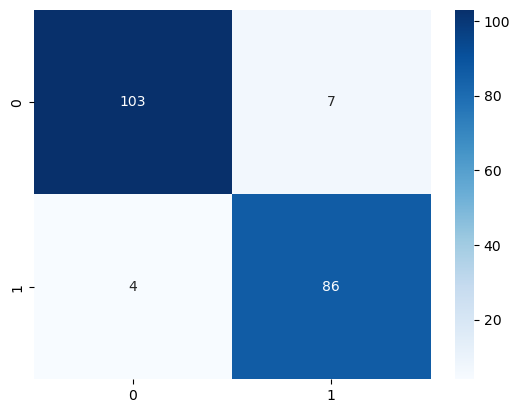

In [20]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')